In [75]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [8]:
# Create your connection.
cnx = sqlite3.connect('Player_Attributes.sqlite')

In [9]:
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [13]:
df.head()


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [ ]:
# Exploratory Data Analysis

In [11]:
df.shape

(183978, 42)

In [12]:
df.columns 

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [14]:
df.isnull().sum()


id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [15]:
# which columns to keep ?  all except first four 
soccer_data = df.copy()
soccer_data =soccer_data.drop(["id", "player_fifa_api_id", "player_api_id", "date"], axis = 1)
soccer_data.head()


,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [ ]:
#1. Initial Exploration

In [16]:
soccer_data.duplicated().any()


True

In [17]:
# removing the duplicates   
soccer_data = soccer_data.drop_duplicates()
soccer_data.shape


(138440, 38)

In [18]:
soccer_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 138440 entries, 0 to 183977
Data columns (total 38 columns):
overall_rating         138439 non-null float64
potential              138439 non-null float64
preferred_foot         138439 non-null object
attacking_work_rate    136628 non-null object
defensive_work_rate    138439 non-null object
crossing               138439 non-null float64
finishing              138439 non-null float64
heading_accuracy       138439 non-null float64
short_passing          138439 non-null float64
volleys                136958 non-null float64
dribbling              138439 non-null float64
curve                  136958 non-null float64
free_kick_accuracy     138439 non-null float64
long_passing           138439 non-null float64
ball_control           138439 non-null float64
acceleration           138439 non-null float64
sprint_speed           138439 non-null float64
agility                136958 non-null float64
reactions              138439 non-null float64

In [19]:
soccer_data.describe()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,136958.000000,138439.000000,136958.000000,138439.000000,...,136958.000000,138439.000000,138439.00000,138439.000000,136958.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000
mean,69.295061,73.996923,55.524643,50.194331,57.772940,62.962149,49.890959,59.483469,53.319543,49.783175,...,58.517283,55.459061,47.33016,50.929081,48.510397,14.951271,16.334595,21.822911,16.406453,16.741020
std,6.861178,6.552489,17.462248,19.284744,16.782279,14.300325,18.543740,17.972028,18.490113,18.073022,...,15.199206,15.752390,21.56854,21.762017,21.907442,17.305276,16.278454,22.209866,16.526526,17.642358
min,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,2.000000,1.00000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,65.000000,69.000000,46.000000,34.000000,50.000000,58.000000,36.000000,52.000000,41.000000,37.000000,...,50.000000,46.000000,25.00000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,69.000000,74.000000,60.000000,53.000000,60.000000,66.000000,53.000000,64.000000,56.000000,51.000000,...,61.000000,57.000000,52.00000,57.000000,54.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,74.000000,78.000000,68.000000,66.000000,69.000000,72.000000,64.000000,72.000000,68.000000,64.000000,...,69.000000,67.000000,67.00000,70.000000,68.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,97.000000,94.000000,97.000000,...,97.000000,96.000000,96.00000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [ ]:
2. Correcting

In [20]:
soccer_data.isnull().sum()

overall_rating            1
potential                 1
preferred_foot            1
attacking_work_rate    1812
defensive_work_rate       1
crossing                  1
finishing                 1
heading_accuracy          1
short_passing             1
volleys                1482
dribbling                 1
curve                  1482
free_kick_accuracy        1
long_passing              1
ball_control              1
acceleration              1
sprint_speed              1
agility                1482
reactions                 1
balance                1482
shot_power                1
jumping                1482
stamina                   1
strength                  1
long_shots                1
aggression                1
interceptions             1
positioning               1
vision                 1482
penalties                 1
marking                   1
standing_tackle           1
sliding_tackle         1482
gk_diving                 1
gk_handling               1
gk_kicking          

In [21]:
soccer_data['preferred_foot'].value_counts()


right    104645
left      33794
Name: preferred_foot, dtype: int64

In [22]:
soccer_data['preferred_foot'] =soccer_data['preferred_foot'].map({'right': 0, 'left': 1})

In [24]:
soccer_data['attacking_work_rate'].value_counts()


medium    93616
high      32798
low        6704
None       2959
norm        294
y           101
le           86
stoc         70
Name: attacking_work_rate, dtype: int64

In [25]:
soccer_data.replace(to_replace = ['None', 'y', 'le', 'stoc', 'norm'],value = 'medium', inplace = True)
soccer_data['attacking_work_rate'].value_counts()


medium    97126
high      32798
low        6704
Name: attacking_work_rate, dtype: int64

In [26]:
soccer_data['attacking_work_rate'] = soccer_data['attacking_work_rate'].map({'medium': 1, 'low': 0, 'high' : 2})


In [27]:
soccer_data['defensive_work_rate'].value_counts()


medium    97955
high      21351
low       13732
_0         1811
o          1345
1           337
ormal       294
2           251
3           192
7           173
5           161
6           159
0           154
9           117
es          101
4            93
ean          86
tocky        70
8            57
Name: defensive_work_rate, dtype: int64

In [28]:
soccer_data.replace(['_0', 'o', '1', 'ormal', '2', '3', '7', '5', '6', '0', '9', 'es', '4', 'ean', 'tocky', '8'], 'medium', inplace = True)


In [30]:
soccer_data['defensive_work_rate'] = soccer_data['defensive_work_rate'].map({'medium': 1, 'low': 0, 'high' : 2})


In [31]:
soccer_data.fillna(soccer_data.mean(), inplace = True)
soccer_data.isnull().any()

overall_rating         False
potential              False
preferred_foot         False
attacking_work_rate    False
defensive_work_rate    False
crossing               False
finishing              False
heading_accuracy       False
short_passing          False
volleys                False
dribbling              False
curve                  False
free_kick_accuracy     False
long_passing           False
ball_control           False
acceleration           False
sprint_speed           False
agility                False
reactions              False
balance                False
shot_power             False
jumping                False
stamina                False
strength               False
long_shots             False
aggression             False
interceptions          False
positioning            False
vision                 False
penalties              False
marking                False
standing_tackle        False
sliding_tackle         False
gk_diving              False
gk_handling   

In [ ]:
3. Visualize the data

In [36]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [37]:
sns.set()

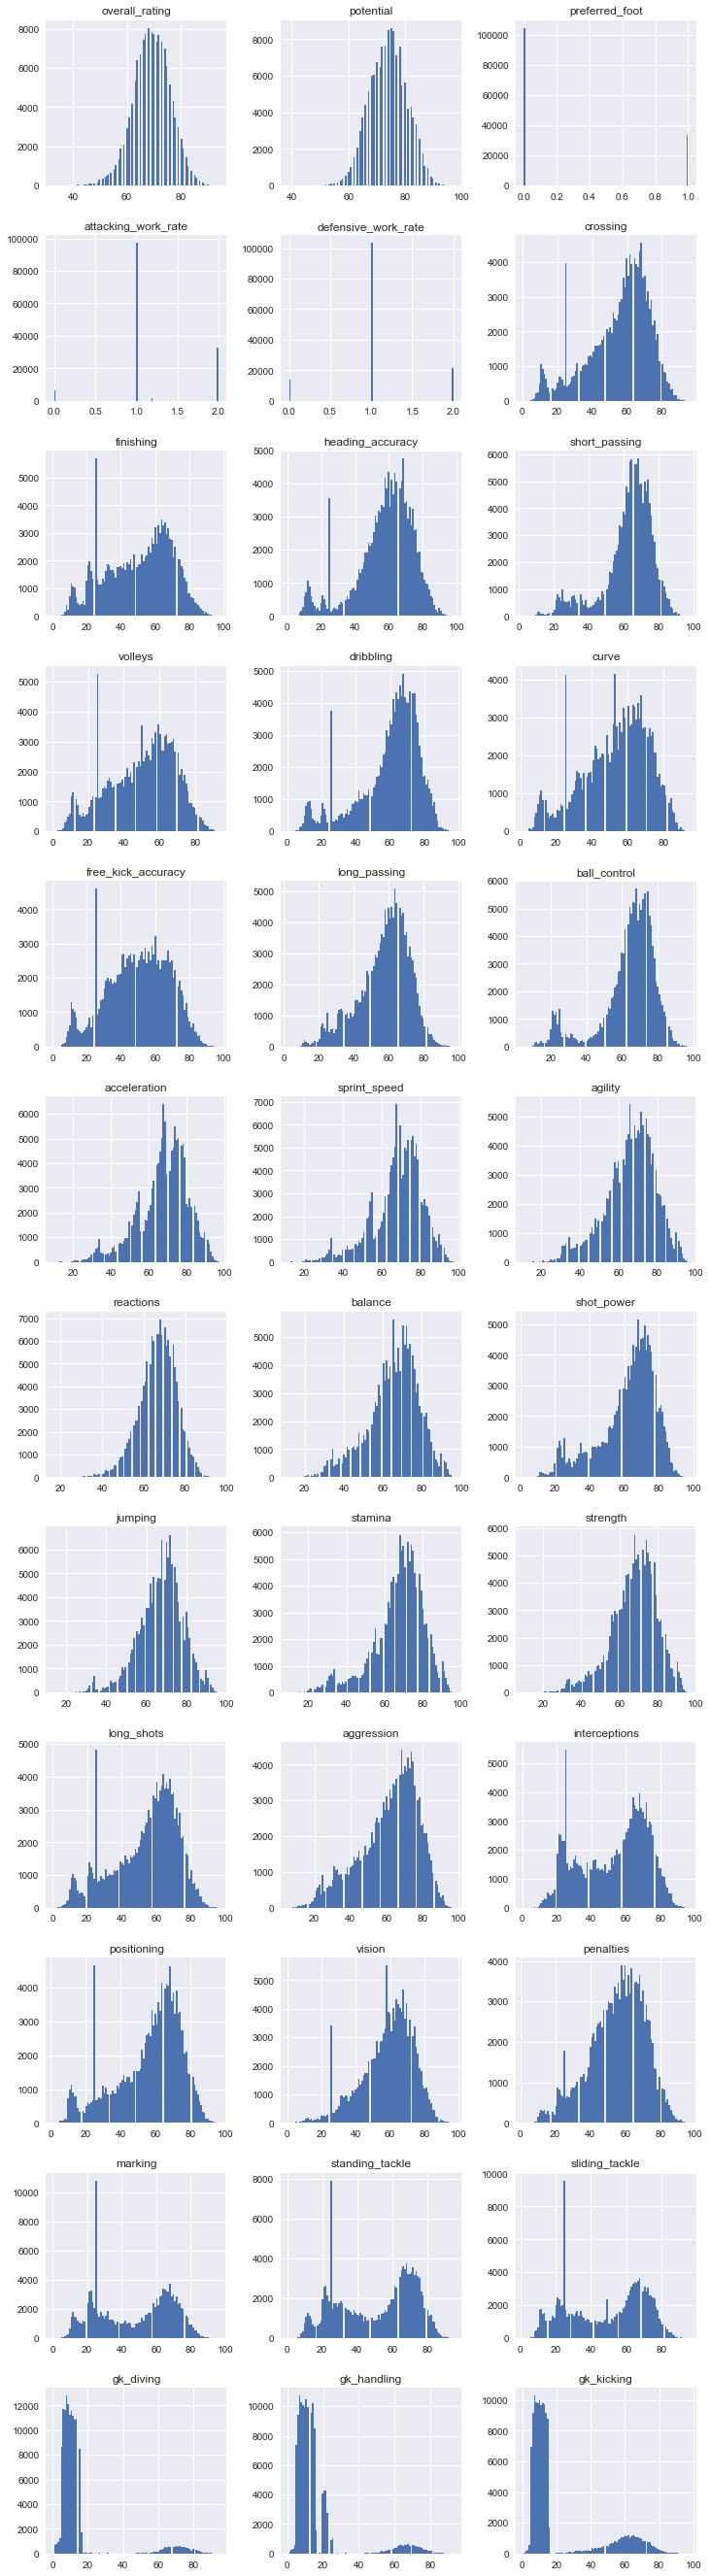

In [38]:
fig, axes = plt.subplots(len(soccer_data.columns)//3, 3, figsize=(12, 48))

i = 0
for triaxis in axes:
    for axis in triaxis:
        soccer_data.hist(column = soccer_data.columns[i], bins = 100, ax=axis)
        i = i+1 
plt.show()


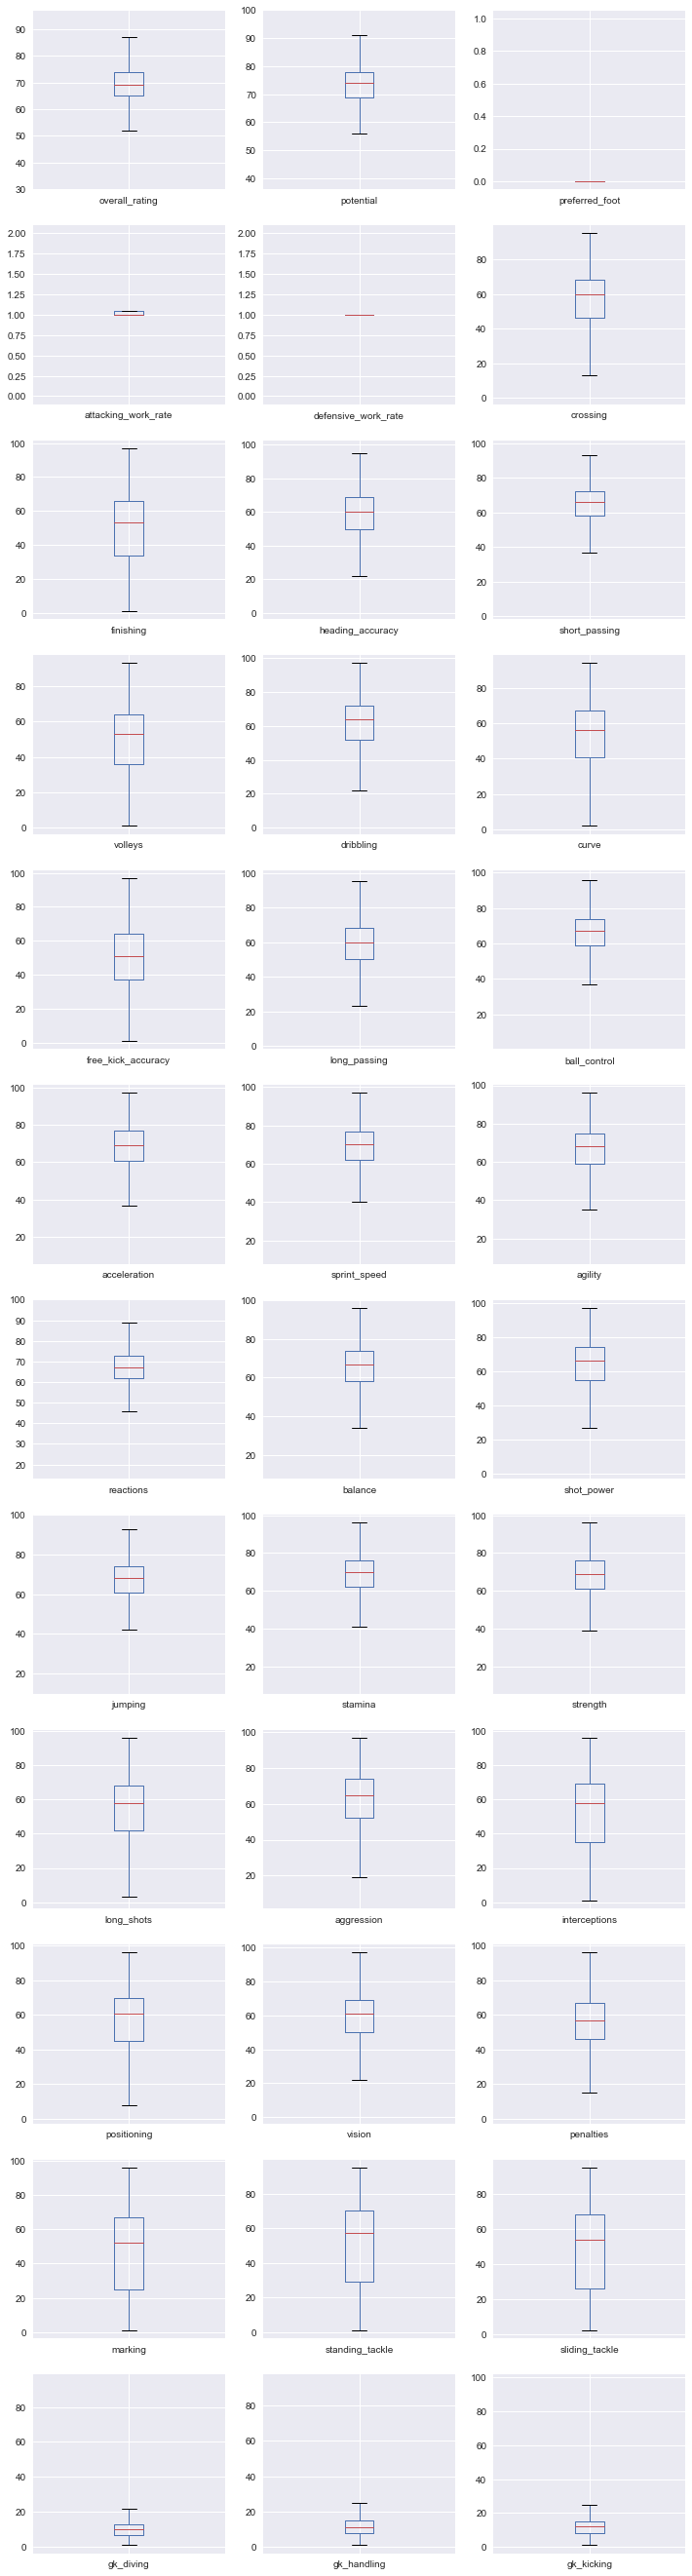

In [39]:
fig, axes = plt.subplots(len(soccer_data.columns)//3, 3, figsize=(12, 48))

i = 0
for triaxis in axes:
    for axis in triaxis:
        soccer_data.boxplot(column = soccer_data.columns[i], ax=axis)
        i = i+1 
plt.show()


In [ ]:
# Feature Selection and Model Selection

In [40]:
columns = ['potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']
X = soccer_data[columns]
y = soccer_data['overall_rating']
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)


In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 30)
fit = pca.fit(X_std)
X_new = pca.fit_transform(X_std)


In [42]:
fit.explained_variance_.sum()


36.650483251629488

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
lm.fit(X, y)


print(lm.intercept_)
print(lm.coef_)


-2.62495342567
[ 0.38970538 -0.03427548 -0.23464119 -0.04681723  0.01974608  0.01105922
  0.06719786  0.04945191  0.00390405 -0.01191666  0.01257181  0.01346706
  0.0073271   0.13053372  0.00634425  0.00936507 -0.01054982  0.20883031
  0.00766889  0.01578315  0.0151481  -0.00497642  0.05754328 -0.01248436
  0.01973126  0.01136911 -0.00962736 -0.00541881  0.01321517  0.03044627
  0.00203458 -0.0255577   0.16047301  0.02917542 -0.02958268  0.05048111
  0.02423643]


In [104]:
import statsmodels.api as sm
X1 = sm.add_constant(X)
result = sm.OLS(y, X1).fit()
#print dir(result)
print (result.rsquared, result.rsquared_adj)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


0.837544773016 0.837501342694


In [106]:
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:         overall_rating   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                 1.928e+04
Date:                Wed, 11 Jul 2018   Prob (F-statistic):               0.00
Time:                        12:12:32   Log-Likelihood:            -3.3726e+05
No. Observations:              138440   AIC:                         6.746e+05
Df Residuals:                  138402   BIC:                         6.750e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.6250    

In [66]:
print(cross_val_score(lm, X_new, y,cv = 5).mean()) 

0.831087116904
